In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
# Table Measurement's fields
first_row = session.query(Measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17558fa50c8>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Table Station's fields
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17558fabf88>,
 'latitude': 21.2716,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# -- What's the last date?
# -- Convert to string, take only the first result so that it isn't a list.
LastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(LastDate)
# -- Okay. 2017-08-23 is the last entry in the Measurements table.

2017-08-23


In [13]:
type(LastDate)

str

In [14]:
LastDate.split('-')

['2017', '08', '23']

In [15]:
LastDateSplit = LastDate.split('-')
LastDate_dateformat = dt.date(int(LastDateSplit[0]),int(LastDateSplit[1]),int(LastDateSplit[2])) 
print(LastDate_dateformat)

2017-08-23


In [16]:
type(LastDate_dateformat)

datetime.date

In [17]:
# Calculate the date 1 year ago from the last data point in the database
# --- So take the year and subtract one, I guess.
PreviousYear = LastDate_dateformat.year - 1
LastDateSplit = LastDate.split('-')
BeginDate_dateformat = dt.date(PreviousYear, int(LastDateSplit[1]), int(LastDateSplit[2]))
print(BeginDate_dateformat)

2016-08-23


In [18]:
# From Zoey. But this is the same as mine already.
# queryresults = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=lastyear).all()

In [19]:
# Perform a query to retrieve the data and precipitation scores
date_str = str(BeginDate_dateformat)
qresults = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_str).all()

In [20]:
# From Zoey. But not any different than mine. 
# prcp_df = pd.DataFrame(queryresults)
# prcp_df

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_df = pd.DataFrame(qresults)
Measurement_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [22]:
# Sort the dataframe by date
#Measurement_df = Measurement_df.sort_values(by=['date'])
#Measurement_df.reset_index(inplace=True)

#From Zoey. This is different. 
Measurement_df = Measurement_df.set_index(Measurement_df["date"])
Measurement_df = Measurement_df.sort_index()

Measurement_df

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [23]:
# Use Pandas Plotting with Matplotlib to plot the data

# -- Let's get rid of the NaNs...
Measurement_df.dropna()

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


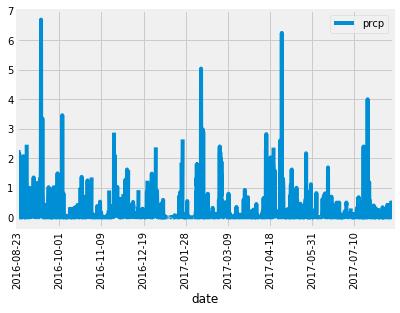

In [24]:
Measurement_df.plot(rot=90)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [25]:
Measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# select station, count(station) as stationCounts from Measurement \
# group by station \
# order by stationCounts desc

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# --- Assuming that "tobs" is temperature.... ---
# select station, min(tobs), max(tobs), mean(tobs) from Measurement \
# where station == 'USC00519281'

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# select date, tobs from Measurement \
#   where (date >= BeginDate_timeformat) and (station == "USC00519281")

# --- I guess I could brute force it ---
# lastyear = dt.date(2017,8,23)-dt.timedelta(days=365)

# --- Right now I have BeginDate_dateformat already. So reuse some of that to create a string.

lastyear = dt.date(PreviousYear, int(LastDateSplit[1]), int(LastDateSplit[2]))
queryresults = session.query(Measurement.tobs).filter(Measurement.date>=lastyear).\
    filter(Measurement.station == "USC00519281").all()

temperatures_df = pd.DataFrame(queryresults)

temperatures_df.head(10)

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


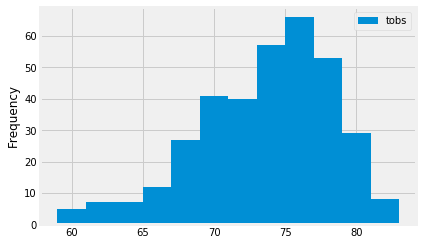

In [31]:
# Histograph using 12 bins.

temperatures_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05')[0])

(62.0, 69.57142857142857, 74.0)


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
Tmin, Tave, Tmax = calc_temps(BeginDate_dateformat, LastDate_dateformat)[0]
print(Tmin, Tave, Tmax)

58.0 74.59058295964125 87.0


NotImplementedError: Operator 'getitem' is not supported on this expression

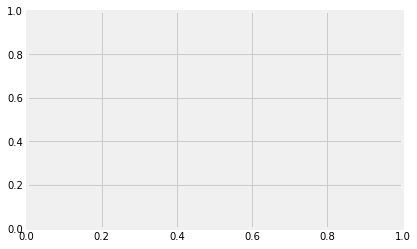

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

Peak2Peak = Tmax-Tmin

plt.errorbar(x=Measurement.date, y=Tave, yerr=Peak2Peak)

# --- isn't x the dates? ---

In [64]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# select station, station.name, station.latitude, station.longitude, station.elevation, sum(prcp) as totalPrcp from measurement \
#    join by station on (measurement.id == station.id) \
#    group by station \
#    order by totalPrcp desc

session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  9612.810000000345),
 ('USC00519281',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  5297.7600000003895),
 ('USC00513117',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  3443.5800000001063),
 ('USC00519523',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2661.120000000018),
 ('USC00514830',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2110.40999999993),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1184.5799999999226),
 ('USC00511918',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  834.119999999968),
 ('USC00518838',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  637.8299999999936),
 ('USC00517948',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  390.95999999999873)]

In [66]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [73]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# --- Let's go from June 1, 2016 to June 14, 2016
StartDate = dt.date(2016, 6, 1)
EndDate = dt.date(2016, 6, 14)

# Use the start and end date to create a range of dates
DateList = []
delta = EndDate - StartDate
# print(delta.days)

date_list = pd.date_range(StartDate, periods=delta.days).tolist()
print(date_list)

[Timestamp('2016-06-01 00:00:00', freq='D'), Timestamp('2016-06-02 00:00:00', freq='D'), Timestamp('2016-06-03 00:00:00', freq='D'), Timestamp('2016-06-04 00:00:00', freq='D'), Timestamp('2016-06-05 00:00:00', freq='D'), Timestamp('2016-06-06 00:00:00', freq='D'), Timestamp('2016-06-07 00:00:00', freq='D'), Timestamp('2016-06-08 00:00:00', freq='D'), Timestamp('2016-06-09 00:00:00', freq='D'), Timestamp('2016-06-10 00:00:00', freq='D'), Timestamp('2016-06-11 00:00:00', freq='D'), Timestamp('2016-06-12 00:00:00', freq='D'), Timestamp('2016-06-13 00:00:00', freq='D')]


In [81]:




# Stip off the year and save a list of %m-%d strings


# Loop through the list of %m-%d strings and calculate the normals for each date

AttributeError: module 'datetime' has no attribute 'strptime'

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
